In [1]:
import os
import sys
sys.path.append('../code/')

from nn_models import *
from nn_train_utils import *
from kinematics_decoding import load_model
from tensorflow.python import pywrap_tensorflow
from collections import defaultdict
import glob
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

In [8]:
all_models = pickle.load(open('./newconvmodels.p', 'rb'))
best_model_arch = all_models[all_models['arch_type'] == 'spatial_temporal'].nlargest(1, 'test_accuracy')

In [9]:
best_model_arch

,arch_type,nlayers,n_skernels,n_tkernels,s_kernelsize,t_kernelsize,s_stride,t_stride,validation_accuracy,test_accuracy,train_accuracy,parameters
52,spatial_temporal,4,"[8, 16, 16, 32]","[32, 32, 64, 64]",7,9,2,3,0.989604,0.989425,0.996594,80112


In [3]:
import pickle

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Make sure that the validation/training accuracy and test accuracy are very similar.**

In [18]:
rec_folders = glob.glob('../../nn-training/experiment_8/*_*_*')

rec_keylist = ['rec_blocktype', 'npplayers', 'nppfilters',  
                's_kernelsize', 's_stride', 'n_recunits', 
                'validation_accuracy', 'seed']

In [19]:
rec_dict = defaultdict(list)

for folder in rec_folders:
    try:
        with open(os.path.join(folder, 'config.yaml')) as myfile:
            myconfig = yaml.load(myfile)    
    except:
        print(folder)    
    for key in rec_keylist:
        rec_dict[key].append(myconfig[key])

In [20]:
all_rec_models = pd.DataFrame(rec_dict)

all_rec_models = all_rec_models.astype({'npplayers': int, 
                                        's_kernelsize':int, 
                                        'n_recunits': int, 
                                        's_stride': int})

In [13]:
all_rec_models

,n_recunits,nppfilters,npplayers,rec_blocktype,s_kernelsize,s_stride,validation_accuracy
0,256,"[8, 16, 16]",3,lstm,5,1,0.000000
1,256,"[8, 16, 16]",3,lstm,5,1,0.000000
2,256,"[8, 16, 16]",3,lstm,5,1,0.995000
3,256,"[8, 16, 16]",3,lstm,5,1,0.000000
4,256,"[8, 16, 16]",3,lstm,5,1,0.000000
5,256,"[8, 16, 16]",3,lstm,5,1,0.996250
6,256,"[8, 16, 16]",3,lstm,5,1,0.997250
7,256,"[8, 16, 16]",3,lstm,5,1,0.996000
8,256,"[8, 16, 16]",3,lstm,5,1,0.000000
9,256,"[8, 16, 16]",3,lstm,5,1,0.995875


In [8]:
# Load train dataset as test
PATH_TO_DATA = os.path.abspath('../../dataset/')
train_dataset = Dataset(os.path.join(PATH_TO_DATA, 'pcr_dataset_train.hdf5'), dataset_type='test', key='spindle_info')

In [9]:
rec_train_accuracies = [evaluate_model(
    load_model(all_rec_models.iloc[i], 6, 'rec', is_trained=True), train_dataset) for i in range(all_rec_models.shape[0])]

INFO:tensorflow:Restoring parameters from /gpfs01/bethge/share/deep_proprioception/DeepDraw/../nn-training/experiment_6/lstm_3_8-32-32_64/model.ckpt
INFO:tensorflow:Restoring parameters from /gpfs01/bethge/share/deep_proprioception/DeepDraw/../nn-training/experiment_6/lstm_1_8_64/model.ckpt
INFO:tensorflow:Restoring parameters from /gpfs01/bethge/share/deep_proprioception/DeepDraw/../nn-training/experiment_6/lstm_3_16-32-32_128/model.ckpt
INFO:tensorflow:Restoring parameters from /gpfs01/bethge/share/deep_proprioception/DeepDraw/../nn-training/experiment_6/lstm_3_16-16-16_128/model.ckpt
INFO:tensorflow:Restoring parameters from /gpfs01/bethge/share/deep_proprioception/DeepDraw/../nn-training/experiment_6/lstm_4_8-8-32-32_256/model.ckpt
INFO:tensorflow:Restoring parameters from /gpfs01/bethge/share/deep_proprioception/DeepDraw/../nn-training/experiment_6/lstm_2_32-32_128/model.ckpt
INFO:tensorflow:Restoring parameters from /gpfs01/bethge/share/deep_proprioception/DeepDraw/../nn-training

In [6]:
# Load test dataset
PATH_TO_DATA = os.path.abspath('../../dataset/')
test_dataset = Dataset(os.path.join(PATH_TO_DATA, 'pcr_dataset_test.hdf5'), dataset_type='test', key='spindle_info')

rec_test_accuracies = [evaluate_model(
    load_model(all_rec_models.iloc[i], 6, 'rec', is_trained=True), test_dataset) for i in range(all_rec_models.shape[0])]

INFO:tensorflow:Restoring parameters from /gpfs01/bethge/share/deep_proprioception/DeepDraw/../nn-training/experiment_6/lstm_3_8-16-16_256/model.ckpt
INFO:tensorflow:Restoring parameters from /gpfs01/bethge/share/deep_proprioception/DeepDraw/../nn-training/experiment_6/lstm_3_8-16-16_256/model.ckpt


KeyboardInterrupt: 

In [14]:
all_rec_models

,n_recunits,nppfilters,npplayers,rec_blocktype,s_kernelsize,s_stride,validation_accuracy
0,256,"[8, 16, 16]",3,lstm,5,1,0.000000
1,256,"[8, 16, 16]",3,lstm,5,1,0.000000
2,256,"[8, 16, 16]",3,lstm,5,1,0.995000
3,256,"[8, 16, 16]",3,lstm,5,1,0.000000
4,256,"[8, 16, 16]",3,lstm,5,1,0.000000
5,256,"[8, 16, 16]",3,lstm,5,1,0.996250
6,256,"[8, 16, 16]",3,lstm,5,1,0.997250
7,256,"[8, 16, 16]",3,lstm,5,1,0.996000
8,256,"[8, 16, 16]",3,lstm,5,1,0.000000
9,256,"[8, 16, 16]",3,lstm,5,1,0.995875


In [21]:
model = load_model(all_rec_models.iloc[0], 8, 'rec', is_trained=True)
path_to_ckptfile = os.path.join(model.model_path, 'model.ckpt')
ckptReader = pywrap_tensorflow.NewCheckpointReader(path_to_ckptfile)
shape_map = ckptReader.get_variable_to_shape_map()

In [23]:
model.__dict__

{'CPU': False,
 'experiment_id': 8,
 'is_training': True,
 'model_path': '/gpfs01/bethge/share/deep_proprioception/DeepDraw/../nn-training/experiment_8/lstm_3_8-16-16_256_1',
 'n_recunits': 256,
 'name': 'lstm_3_8-16-16_256_1',
 'nclasses': 20,
 'nppfilters': [8, 16, 16],
 'npplayers': 3,
 'num_parameters': 0,
 'rec_blocktype': 'lstm',
 's_kernelsize': 5,
 's_stride': 1,
 'seed': 1}

In [22]:
shape_map

{'Network/Classifier/biases': [20],
 'Network/Classifier/biases/Adam': [20],
 'Network/Classifier/biases/Adam_1': [20],
 'Network/Classifier/weights': [256, 20],
 'Network/Classifier/weights/Adam': [256, 20],
 'Network/Classifier/weights/Adam_1': [256, 20],
 'Network/RecurrentBlock/opaque_kernel': [673792],
 'Network/RecurrentBlock/opaque_kernel/Adam': [673792],
 'Network/RecurrentBlock/opaque_kernel/Adam_1': [673792],
 'Network/Spatial0/LayerNorm/beta': [8],
 'Network/Spatial0/LayerNorm/beta/Adam': [8],
 'Network/Spatial0/LayerNorm/beta/Adam_1': [8],
 'Network/Spatial0/LayerNorm/gamma': [8],
 'Network/Spatial0/LayerNorm/gamma/Adam': [8],
 'Network/Spatial0/LayerNorm/gamma/Adam_1': [8],
 'Network/Spatial0/weights': [5, 1, 2, 8],
 'Network/Spatial0/weights/Adam': [5, 1, 2, 8],
 'Network/Spatial0/weights/Adam_1': [5, 1, 2, 8],
 'Network/Spatial1/LayerNorm/beta': [16],
 'Network/Spatial1/LayerNorm/beta/Adam': [16],
 'Network/Spatial1/LayerNorm/beta/Adam_1': [16],
 'Network/Spatial1/LayerN

In [11]:
rec_val_accuracies = all_rec_models['validation_accuracy'].tolist()
all_rec_models['test_accuracy'] = pd.Series(rec_test_accuracies)
all_rec_models['train_accuracy'] = pd.Series(rec_train_accuracies)

In [12]:
def num_parameters(model_path):
    path_to_ckptfile = os.path.join(model_path, 'model.ckpt')
    ckptReader = pywrap_tensorflow.NewCheckpointReader(path_to_ckptfile)
    shape_map = ckptReader.get_variable_to_shape_map()
    all_keys = list(shape_map.keys())
    weight_keys = [key for key in all_keys if 'weights' in key or 'opaque_kernel' in key]
    useful_keys = [key for key in weight_keys if 'Adam' not in key]
    useful_keys = [key for key in useful_keys if 'Classifier' not in key]
    num_parameters = 0
    for key in useful_keys:
        num_parameters += np.product(shape_map[key])
        
    if num_parameters == np.nan:
        print('Number of parameters could not be computed!!')
        
    return num_parameters

num_pars_rec = []
for i in range(all_rec_models.shape[0]):
    mymodel = load_model(all_rec_models.iloc[i], 6, 'rec', True)
    num_pars_rec.append(num_parameters(mymodel.model_path))

all_rec_models['parameters'] = pd.Series(num_pars_rec, index=all_rec_models.index, dtype=int)

In [14]:
all_rec_models.to_pickle('recmodels.p')

In [15]:
import pickle
a = pickle.load(open('recmodels.p', 'rb'))

(0.76, 1.01)

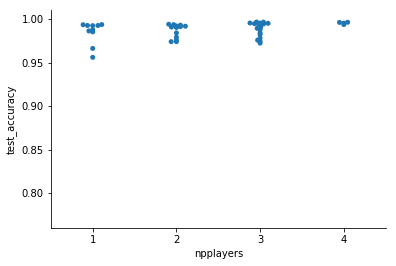

In [31]:
sns.swarmplot(x='npplayers', y='test_accuracy', data=a, color='C0')
sns.despine()
plt.ylim([0.76, 1.01])
# sns.swarmplot(x=a['nlayers']+0.4, y='test_accuracy', data=a[a['arch_type']=='spatial_temporal'], color='C1')

In [20]:
b = pickle.load(open('convmodels_2.p', 'rb'))

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


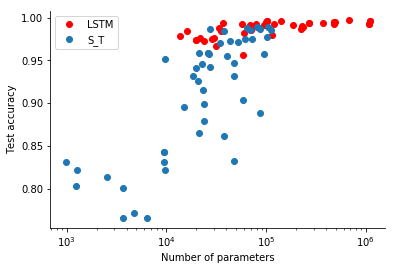

In [33]:
plt.plot(a['parameters'], a['test_accuracy'], 'ro')
plt.plot(b['parameters'], b['test_accuracy'], 'o')
plt.xscale('log')
plt.xlabel('Number of parameters'); plt.ylabel('Test accuracy')
plt.legend(['LSTM', 'S_T']); sns.despine()